### **1️⃣ Introducción**

El dataset de abandono de clientes de telecomunicaciones contiene información sobre una empresa ficticia de telecomunicaciones que brindó servicios de telefonía fija e Internet a 7,043 clientes en California durante el tercer trimestre. El conjunto de datos indica qué clientes han dejado la empresa, cuáles se han mantenido y cuáles se han suscrito a sus servicios. Además, incluye diversas variables demográficas clave, junto con una puntuación de satisfacción, una puntuación de churn (probabilidad de abandono) y un índice de valor de vida del cliente (CLTV).

> Objetivos del análisis.

Este análisis exploratorio se centra en evaluar si ciertas variables, como el género, el método de pago y el tipo de contrato, tienen una influencia significativa en la tasa de abandono de clientes. Se analizarán patrones y tendencias en los datos sin realizar inferencias causales, con el objetivo de identificar posibles correlaciones y proporcionar información que pueda servir para estrategias futuras de retención de clientes.

### **2️⃣ . Procesamiento y Limpieza de Datos**

Para llevar a cabo el análisis exploratorio sobre la relación entre el abandono de clientes y las variables **género, método de pago y tipo de contrato**, se realizó un proceso de limpieza y preparación de datos en seis archivos diferentes, asegurando la calidad y coherencia de la información antes de su análisis.

- **Customer_Info.ipynb**: Se verificaron valores nulos e inconsistencias en variables como **PARTNER Y MARRIED** eliminando unos de los mismos, ya que eran exactamente iguales. Se aplicó un análisis univariante para identificar posibles valores atípicos y garantizar la validez de los datos.

- **Location_Data.ipynb**: Se estandarizaron los nombres de ciudades, estados y códigos postales, eliminando posibles duplicados, errores en la geolocalización de los clientes y la cantidad poblacional que presentaban.

- **Online_Services.ipynb**: Se revisó la coherencia en las suscripciones a servicios de telefonía e Internet, además de asegurar que las categorías de servicios adicionales (seguridad en línea, respaldo, protección de dispositivos, soporte técnico y streaming) estuvieran correctamente codificadas.

- **Payment_Info.ipynb**: Se analizaron los métodos de pago y la estructura de facturación de cada cliente, detectando valores nulos en montos de cobro y reembolsos. Se estandarizaron las categorías de pago para evitar inconsistencias.

- **Online_Options.ipynb**: Se verificó la duración del contrato (tenure), las referencias de clientes y el volumen de datos descargados, asegurando que los valores estuvieran dentro de rangos razonables y eliminando posibles valores atípicos.

- **Status_Analysis.ipynb**: Se revisó la calidad de las variables de churn (abandono), satisfacción y estado del cliente. Se validó la coherencia entre las etiquetas de abandono y las puntuaciones predictivas de churn.

Una vez finalizada la limpieza individual de cada archivo y realizado el análisis univariante correspondiente, los datasets fueron unificados en una única base de datos, asegurando la correcta vinculación mediante la variable CustomerID (**fusion_df.ipynb**). Este conjunto de datos limpio y estructurado fue posteriormente importado para su análisis exploratorio y evaluación de las variables clave en la predicción del abandono de clientes.

### **3️⃣ Análisis exploratorio (EDA)**

En esta sección se encuentran los análisis y el tratamiento de limpieza realizados para el proyecto:

##### - 📌 **Análisis del Perfil del Cliente:** [Ver análisis completo](scr\Notebooks\customer_info.ipynb)  
##### - 🌍 **Distribución Geográfica de los Clientes:** [Explorar el análisis](scr\Notebooks\location_data.ipynb)  
##### - 💳 **Impacto del Método de Pago en la Retención:** [Acceder al código](scr\Notebooks\payment_method.ipynb)  
##### - 🔌 **Preferencias en los Servicios Contratados:** [Ver visualización](scr\Notebooks\online_options.ipynb)  
##### - 📡 **Uso de Servicios Online y su Relación con el Churn:** [Ver visualización](scr\Notebooks\online_services.ipynb)  
##### - 📉 **Análisis de la Tasa de Abandono de Clientes:** [Ver visualización](scr\Notebooks\status_analysis.ipynb)  


---

### **4️⃣ Hipótesis y Validación del Dataset sobre Abandono del Servicio**  

Este apartado presenta el análisis de hipótesis y la validación de los datos para identificar los factores que influyen en la cancelación del servicio por parte de los clientes. Se exploran diferentes variables como el método de pago, el estado civil, el monto total pagado y las preferencias de servicio, evaluando su impacto en la tasa de abandono.

---

## - 📌 **Análisis del Perfil del Cliente:** [Ver análisis completo](scr\Notebooks\customer_info.ipynb)  

In [11]:
import sys
import os

# Obtener el directorio donde está el notebook
BASE_DIR = os.getcwd()  

# Agregar la carpeta `scr` al path
SCR_PATH = os.path.join(BASE_DIR, "scr")
sys.path.append(SCR_PATH)

### Ahora puedes moverte dentro de `scr`
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importar funciones desde `utils`
from utils.funciones import CategoricalAnalysis, extended_describe

import warnings
warnings.filterwarnings('ignore')


In [12]:
df = pd.read_csv(r"scr\data\clean\customer_info_clean.csv")
df1 = pd.read_csv(r"scr\data\clean\status_analysis_clean.csv")
df2 = pd.merge(left = df, right =df1, on ="customer_id")

In [13]:
df2.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,satisfaction_score,cltv,customer_status,churn_label,churn_category,churn_group,razon_abandono
0,0002-ORFBO,Female,37,No,No,Yes,No,0,3,2205,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
1,0003-MKNFE,Male,46,No,No,No,No,0,5,5414,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
2,0004-TLHLJ,Male,50,No,No,No,No,0,1,4479,Churned,Yes,Competitor,"[70, 80)",Competitor had better devices
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,1,3714,Churned,Yes,Dissatisfaction,"[90, 100)",Product dissatisfaction
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,1,3464,Churned,Yes,Dissatisfaction,"[60, 70)",Network reliability



---

### **1️⃣ . Hipótesis sobre Género y Churn**  

**Hipótesis:** *La tasa de abandono* **no varía significativamente** *entre hombres y mujeres.*  

---

gender       Female  Male
churn_label              
No             2549  2625
Yes             939   930

Chi-cuadrado: 0.4840828822091383
Valor p: 0.48657873605618596


<Figure size 1000x1000 with 0 Axes>

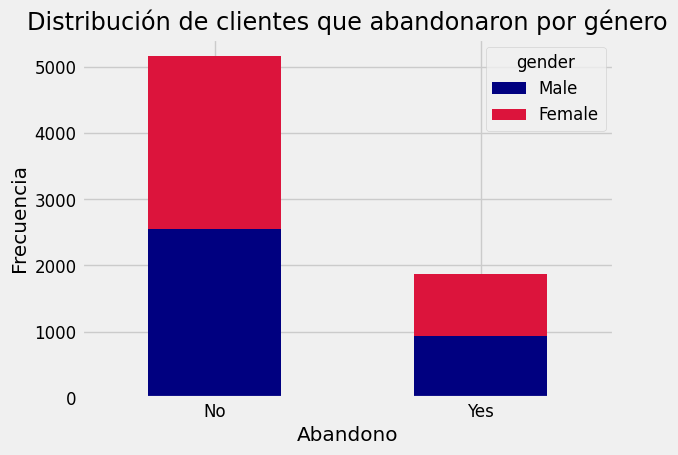

No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que hay una relación significativa entre 'churn_label' y 'gender'.


In [14]:
from scipy.stats import chi2_contingency

df2.replace(df2["gender"], value={'Male': 1, 'Female': 0}, inplace=True)
df2.replace(df2["churn_label"], value={'Yes': 1, 'No': 0}, inplace=True)

contingency_table = pd.crosstab(df2['churn_label'], df2['gender'])

print(contingency_table)

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-cuadrado:", chi2)
print("Valor p:", p)

# Visualizar la distribución de 'Exited' para cada ubicación geográfica
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 12})
    contingency_table.plot(kind='bar', stacked=True, color= ['navy', 'crimson'])
    plt.title('Distribución de clientes que abandonaron por género')
    plt.xlabel('Abandono')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.xticks(rotation=0)
    plt.legend(('Male', 'Female'), title='gender')
    plt.show()
    
# Evaluar la hipótesis nula
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'gender'.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que hay una relación significativa entre 'churn_label' y 'gender'.")

📌 **Interpretación:**  
El valor p es **mayor que 0.05**, lo que indica que **no hay evidencia estadísticamente significativa** para rechazar la hipótesis nula. Esto significa que el género **no influye de manera relevante** en la tasa de abandono del servicio.  

✅ **Conclusión Final:**  
Hombres y mujeres **abandonan el servicio en proporciones similares**, por lo que **no es un factor determinante del churn**. En su lugar, se deberían analizar otras variables como **tipo de contrato, método de pago o monto de Total Charges**, que sí han mostrado una diferencia significativa.  


---

### **2️⃣. Hipótesis sobre Edad y Churn**  

- **Hipótesis:** *Los clientes* **mayores de 65 años** *tienen una mayor tasa de abandono en comparación con clientes más jóvenes.*  

---


age_group    Senior  Young
churn_label               
No              950   4224
Yes            1615    254

Chi-cuadrado: 2742.8247876567852
Valor p: 0.0


<Figure size 1200x1800 with 0 Axes>

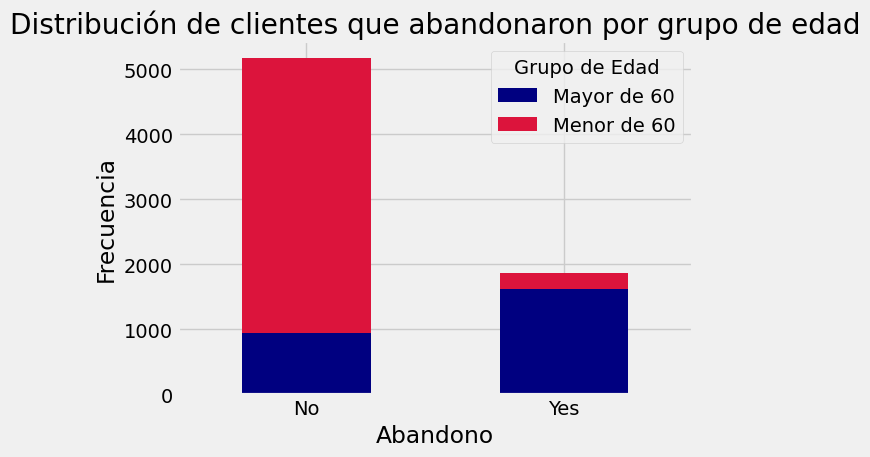

Rechazamos la hipótesis nula: Existe una relación significativa entre la edad del cliente y el abandono.


In [15]:
# Definir función para clasificar edades
def categorize_age(age_range):
    lower_bound = int(age_range.split(",")[0].replace("[", ""))
    return 'Young' if lower_bound < 65 else 'Senior'

# Aplicar la función para crear una nueva columna categórica
df2['age_group'] = df2['churn_group'].apply(categorize_age)

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df2['churn_label'], df2['age_group'])

# Mostrar la tabla
print(contingency_table)

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-cuadrado:", chi2)
print("Valor p:", p)


# Visualizar la distribución de churn por grupo de edad
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,18))
    contingency_table.plot(kind='bar', stacked=True, color=['navy', 'crimson'])
    plt.title('Distribución de clientes que abandonaron por grupo de edad')
    plt.xlabel('Abandono')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.legend(("Mayor de 60", "Menor de 60"),title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

# Evaluar la hipótesis nula
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre la edad del cliente y el abandono.")
else:
    print("No Rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que la edad influye en el churn.")


📌 **Interpretación:**  
El valor p es **menor que 0.05**, lo que indica que **hay evidencia estadísticamente significativa** para no rechazar la hipótesis nula. Esto significa que la edad  **influye de manera relevante** en la tasa de abandono del servicio.  

✅ **Conclusión Final:**  
La edad de nuestros clientes **influye significativamente en el churn**, lo que sugiere que ciertos grupos etarios pueden ser más propensos a abandonar el servicio. Para comprender mejor este comportamiento, sería clave analizar cómo se relaciona la edad con otras variables como **tipo de contrato, método de pago y monto de Total Charges**. Esto nos permitiría identificar patrones más específicos y diseñar estrategias dirigidas a reducir la tasa de abandono en los segmentos más vulnerables. 



---

### **3️⃣. Hipótesis sobre Estado Civil y Churn**  
- **Hipótesis:** Los clientes **casados** tienen una menor tasa de abandono en comparación con los clientes solteros.   

---

partner        No   Yes
churn_label            
No           2441  2733
Yes          1200   669

Chi-cuadrado: 158.7333820309922
Valor p: 2.1399113440759935e-36


<Figure size 1000x1000 with 0 Axes>

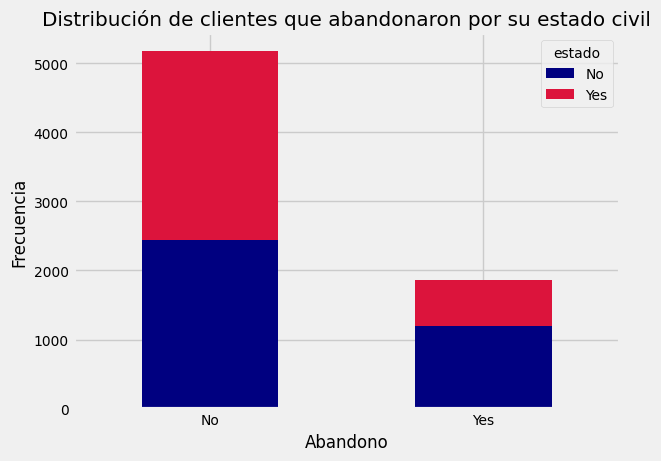

Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'partner'.


In [16]:
df2.replace(df2["partner"], value={'Yes': 1, 'No': 0}, inplace=True)

contingency_table = pd.crosstab(df2['churn_label'], df2['partner'])

print(contingency_table)

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-cuadrado:", chi2)
print("Valor p:", p)

# Visualizar la distribución de 'Exited' para cada ubicación geográfica
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 10})
    contingency_table.plot(kind='bar', stacked=True, color= ['navy', 'crimson'])
    plt.title('Distribución de clientes que abandonaron por su estado civil')
    plt.xlabel('Abandono')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.xticks(rotation=0)
    plt.legend(('No', 'Yes'), title='estado')
    plt.show()
    
# Evaluar la hipótesis nula
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'partner'.")
else:
    print("No Rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que hay una relación significativa entre 'churn_label' y 'partner'.")

📌 **Conclusión sobre Estado Civil y Churn**  

El análisis de chi-cuadrado muestra una **relación significativa** entre el estado civil y la tasa de abandono (**p-valor < 0.05**). Los clientes **casados** presentan una menor tasa de churn en comparación con los clientes solteros.  

🔍 **Interpretación:**  
- Esto sugiere que los clientes casados pueden tener una mayor estabilidad financiera o compromiso con el servicio.  
- Los solteros, por otro lado, podrían estar más dispuestos a cambiar de proveedor o cancelar el servicio.  


------

## - 🌍 **Distribución Geográfica de los Clientes:** [Explorar el análisis](scr\Notebooks\location_data.ipynb)  

In [17]:
df = pd.read_csv(r"scr\data\clean\location_data_clean.csv")
df1 = pd.read_csv(r"scr\data\clean\status_analysis_clean.csv")
df2 = pd.merge(left = df, right =df1, on ="customer_id")

In [18]:
df2.head()

,customer_id,city,zip_code,total_population,latitude,longitude,satisfaction_score,cltv,customer_status,churn_label,churn_category,churn_group,razon_abandono
0,0002-ORFBO,Frazier Park,93225,4498,34.827662,-118.999073,3,2205,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
1,0003-MKNFE,Glendale,91206,31297,34.162515,-118.203869,5,5414,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
2,0004-TLHLJ,Costa Mesa,92627,62069,33.645672,-117.922613,1,4479,Churned,Yes,Competitor,"[70, 80)",Competitor had better devices
3,0011-IGKFF,Martinez,94553,46677,38.014457,-122.115432,1,3714,Churned,Yes,Dissatisfaction,"[90, 100)",Product dissatisfaction
4,0013-EXCHZ,Camarillo,93010,42853,34.227846,-119.079903,1,3464,Churned,Yes,Dissatisfaction,"[60, 70)",Network reliability



---

### **1️⃣. Hipótesis sobre la Ubicación Geográfica y Churn**  
- **Hipótesis:** Existen diferencias en la tasa de abandono de clientes según la **latitud y longitud**, lo que podría indicar patrones regionales en el churn.  

---

In [19]:
from scipy.stats import spearmanr


# Calcular la correlación de Spearman entre churn y coordenadas geográficas
corr_lat, p_lat = spearmanr(df2['churn_label'], df2['latitude'])
corr_lon, p_lon = spearmanr(df2['churn_label'], df2['longitude'])

print(f"Correlación entre churn y latitud: {corr_lat}, p-valor: {p_lat}")
print(f"Correlación entre churn y longitud: {corr_lon}, p-valor: {p_lon}")

# Evaluar significancia estadística
alpha = 0.05
if p_lat < alpha:
    print("La latitud tiene una relación significativa con churn.")
else:
    print("No hay suficiente evidencia para concluir que la latitud influye en churn.")

if p_lon < alpha:
    print("La longitud tiene una relación significativa con churn.")
else:
    print("No hay suficiente evidencia para concluir que la longitud influye en churn.")


Correlación entre churn y latitud: -0.046323736378060504, p-valor: 0.00010065593260520903
Correlación entre churn y longitud: 0.030386848883353405, p-valor: 0.010763671400496909
La latitud tiene una relación significativa con churn.
La longitud tiene una relación significativa con churn.


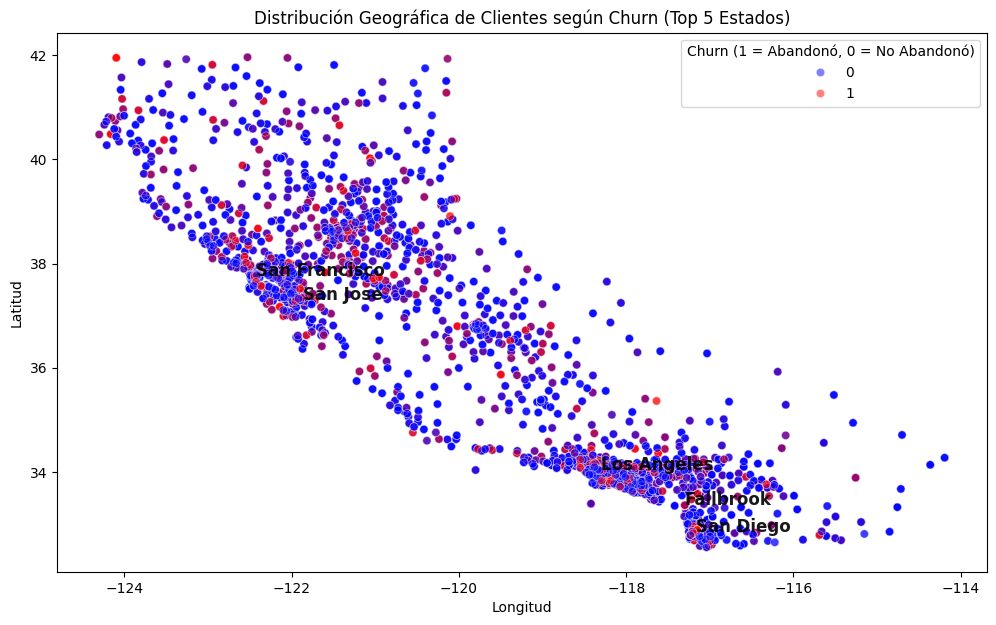

In [20]:
plt.figure(figsize=(12, 7))

df2['churn_label'] = df2['churn_label'].map({'No': 0, 'Yes': 1})

# Crear scatterplot de churn
scatter = sns.scatterplot(
    data=df2, x='longitude', y='latitude', hue='churn_label',
    palette={0: 'blue', 1: 'red'}, alpha=0.5
)

# Obtener los 5 estados con más churn
top_states = df2[df2['churn_label'] == 1]['city'].value_counts().head(5).index

# Agregar etiquetas solo en el centro de los puntos de cada estado
for state in top_states:
    state_data = df2[df2['city'] == state]
    plt.text(state_data['longitude'].mean(),  # Promedio de longitud
             state_data['latitude'].mean(),   # Promedio de latitud
             state, fontsize=12, fontweight='bold', color='black', alpha=0.9)

plt.title("Distribución Geográfica de Clientes según Churn (Top 5 Estados)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Churn (1 = Abandonó, 0 = No Abandonó)")
plt.show()


In [21]:
churn = df2[df2['churn_label'] == 1].groupby('churn_label')['city'].value_counts()
df_churn = pd.DataFrame(churn)
df_churn[df_churn['count'] > 20]

count
churn_label city                
1           San Diego        185
            Los Angeles       78
            San Francisco     31
            San Jose          29
            Fallbrook         26
            Sacramento        26
            Temecula          22

✅ **Conclusión:**  
El análisis muestra que la latitud y la longitud tienen una relación significativa con la tasa de abandono de clientes, aunque el grado de correlación es bajo. Esto sugiere que ciertos factores geográficos pueden influir en la cancelación del servicio, como diferencias en la calidad de la cobertura, competencia en determinadas regiones o variaciones en el poder adquisitivo de los clientes. Identificar estas tendencias puede ayudar a la empresa a desarrollar estrategias localizadas para reducir el churn, como mejoras en la infraestructura o campañas de retención específicas según la ubicación.

---

## - 💳 **Impacto del Método de Pago en la Retención:** [Acceder al código](scr\Notebooks\payment_method.ipynb)  

In [22]:
df = pd.read_csv(r"scr\data\clean\payment_method_clean.csv")
df1 = pd.read_csv(r"scr\data\clean\status_analysis_clean.csv")
df2 = pd.merge(left = df, right =df1, on ="customer_id")

In [23]:
df2.head()

,customer_id,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,cltv,customer_status,churn_label,churn_category,churn_group,razon_abandono
0,0002-ORFBO,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81,3,2205,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
1,0003-MKNFE,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28,5,5414,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
2,0004-TLHLJ,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45,1,4479,Churned,Yes,Competitor,"[70, 80)",Competitor had better devices
3,0011-IGKFF,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51,1,3714,Churned,Yes,Dissatisfaction,"[90, 100)",Product dissatisfaction
4,0013-EXCHZ,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54,1,3464,Churned,Yes,Dissatisfaction,"[60, 70)",Network reliability



---

### 💡 **1️⃣ Hipótesis 1: El tipo de contrato influye en el churn** 🔄📑  
🔍 **Análisis:** Los clientes con contratos **mes a mes** tienen una mayor tasa de abandono en comparación con los clientes que tienen contratos **anuales o de dos años**.  
📊 **Razón:** Los clientes con contratos largos pueden sentirse más comprometidos con el servicio y menos propensos a cambiar de proveedor, mientras que los de **contrato mensual** tienen mayor flexibilidad para cancelar en cualquier momento.  

---



Contrato
0 = Monthly , 1 = Yearly ,  2= Two Years

contract        0     1     2
churn_label                  
0            1955  1384  1835
1            1655   166    48

Chi-cuadrado: 1445.2932428377585
Valor p: 0.0


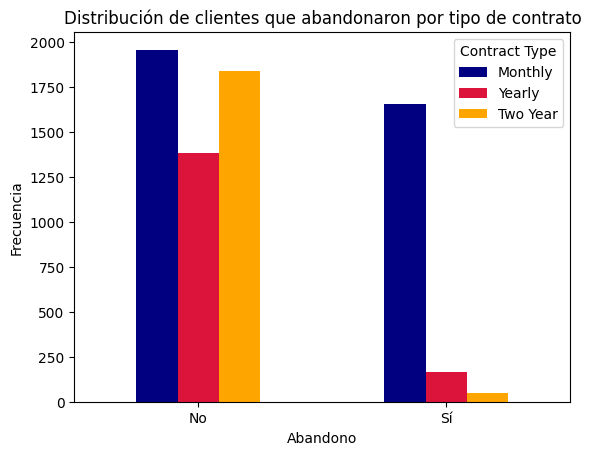

Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'contract'.


In [24]:
from scipy.stats import chi2_contingency

# Reemplazar valores categóricos por numéricos
df2["contract"].replace({'Month-to-Month': 0, 'One Year': 1 , 'Two Year' : 2}, inplace=True)
df2["churn_label"].replace({'Yes': 1, 'No': 0}, inplace=True)

# Crear tabla de contingencia
contingency_table = pd.crosstab(df2['churn_label'], df2['contract'])

# Imprimir tabla de frecuencia
print("Contrato\n0 = Monthly , 1 = Yearly ,  2= Two Years\n")
print(contingency_table)

# Prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Imprimir resultados
print("\nChi-cuadrado:", chi2)
print("Valor p:", p)

ax = contingency_table.plot(kind='bar', stacked=False, color=['navy', 'crimson', 'orange'])
ax.set_title('Distribución de clientes que abandonaron por tipo de contrato')
ax.set_xlabel('Abandono')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['No', 'Sí'], rotation=0)
ax.legend(['Monthly', 'Yearly', 'Two Year'], title='Contract Type')

plt.show()

# Evaluar la hipótesis nula
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'contract'.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que hay una relación significativa entre 'churn_label' y 'contract'.")

**📌 Conclusión sobre la relación entre el tipo de contrato y el churn**  

El resultado de la prueba de **chi-cuadrado (χ² = 1445.29, p = 0.0)** indica que existe una **relación estadísticamente significativa** entre el tipo de contrato y el churn.  

- Los clientes con **contratos "Month-to-Month" (0)** presentan una **tasa de churn mucho mayor** (1655 abandonos) en comparación con aquellos con contratos de **un año (1) o dos años (2)**.  
- La cantidad de clientes que abandonaron disminuye drásticamente en contratos más largos: **166 churn en contratos de un año** y **solo 48 en contratos de dos años**.  

🎯 **Interpretación y posibles estrategias:**  

1️⃣ **Falta de fidelización en contratos mensuales:**  
   - Los clientes con contrato **Month-to-Month** no sienten un compromiso a largo plazo, lo que facilita su abandono.  
   - Esto sugiere que pueden ser más sensibles a precios, promociones o calidad del servicio.  

2️⃣ **Opciones para reducir churn:**  
   - Explorar la relación entre el **tipo de servicio contratado y el churn**, ya que ciertos servicios podrían estar impulsando el abandono.  
   - Diseñar una **estrategia de retención** ofreciendo incentivos para que los clientes de contratos mensuales **migran a planes más largos** (descuentos, servicios exclusivos, recompensas por lealtad).  
   - Evaluar la creación de un **plan híbrido** que combine un contrato flexible con beneficios adicionales para retener clientes sin que se sientan "atados".  


---

### **2️⃣ Hipótesis 2: El método de pago está relacionado con el churn** 💳📩  
🔍 **Análisis:** Los clientes que pagan con **cheques electrónicos** tienen una tasa de churn más alta que aquellos que pagan con tarjeta de crédito o débito automático.  
📊 **Razón:** El pago automático facilita la continuidad del servicio y reduce las cancelaciones por olvidos o molestias en el proceso de pago, mientras que los pagos manuales pueden hacer que los clientes reconsideren su gasto mensualmente.  

---


Mtd. de Pago
'Mailed check' : 0, 'Electronic check' : 1, 'Credit card (automatic)' : 2,'Bank transfer (automatic)' : 3

payment_method     0     1     2     3
churn_label                           
0               1304  1294  1290  1286
1                308  1071   232   258

Chi-cuadrado: 648.1423274814
Valor p: 3.6823546520097993e-140


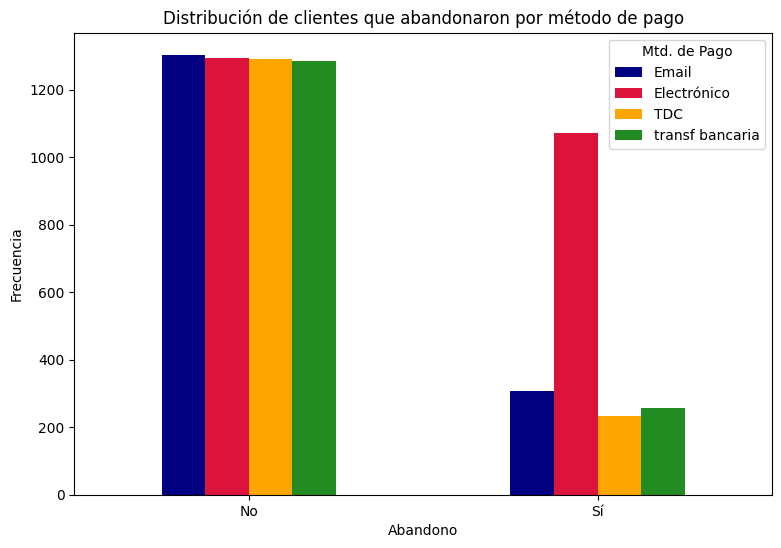

Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'payment_method'.


In [25]:
# Reemplazar valores categóricos por numéricos
df2["payment_method"].replace({'Mailed check' : 0, 'Electronic check' : 1, 'Credit card (automatic)' : 2,
       'Bank transfer (automatic)' : 3}, inplace=True)
df2["churn_label"].replace({'Yes': 1, 'No': 0}, inplace=True)

# Crear tabla de contingencia
contingency_table = pd.crosstab(df2['churn_label'], df2['payment_method'])

# Imprimir tabla de frecuencia
print("Mtd. de Pago\n'Mailed check' : 0, 'Electronic check' : 1, 'Credit card (automatic)' : 2,\
'Bank transfer (automatic)' : 3\n")
print(contingency_table)

# Prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Imprimir resultados
print("\nChi-cuadrado:", chi2)
print("Valor p:", p)

ax = contingency_table.plot(kind='bar', stacked=False, color=['navy', 'crimson', 'orange', 'forestgreen'])

plt.gcf().set_size_inches(9, 6)  # Ajusta el tamaño después de la creación del gráfico

ax.set_title('Distribución de clientes que abandonaron por método de pago')
ax.set_xlabel('Abandono')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['No', 'Sí'], rotation=0)
ax.legend(['Email', 'Electrónico', 'TDC', 'transf bancaria'], title='Mtd. de Pago')

plt.show()

# Evaluar la hipótesis nula
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre 'churn_label' y 'payment_method'.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que hay una relación significativa entre 'churn_label' y 'payment_method'.")

**Hallazgos principales:**  

✅ **Los pagos automáticos (tarjeta de crédito y transferencia bancaria) tienen la menor tasa de churn**. Esto sugiere que los clientes que optan por pagos automatizados son más propensos a quedarse, posiblemente porque no tienen que preocuparse por realizar el pago manualmente cada mes.  

⚠️ **El "Electronic Check" es el método con más churn**. Esto plantea preguntas sobre su facilidad de uso, confiabilidad o posibles costos adicionales. Puede que no sea tan intuitivo como otros métodos automáticos, lo que lleva a frustraciones y abandono del servicio.  

📌 **Recomendación:**  

Sería útil analizar **por qué los clientes que usan "Electronic Check" abandonan más**. Algunas estrategias para reducir el churn podrían ser:  
- Educar a los clientes sobre cómo usar este método de pago correctamente.  
- Incentivar la migración a opciones más estables como tarjeta de crédito o transferencia bancaria.  
- Evaluar si hay costos ocultos o problemas técnicos con el uso de "Electronic Check".  


---

### 💡 **3️⃣ Hipótesis 3: Pagos totales y relación con la cancelación** 💰📉  
🔍 **Análisis:** Los clientes con **cargos totales más bajos** tienden a tener un churn más alto en comparación con aquellos que han pagado más a lo largo del tiempo.  

---  

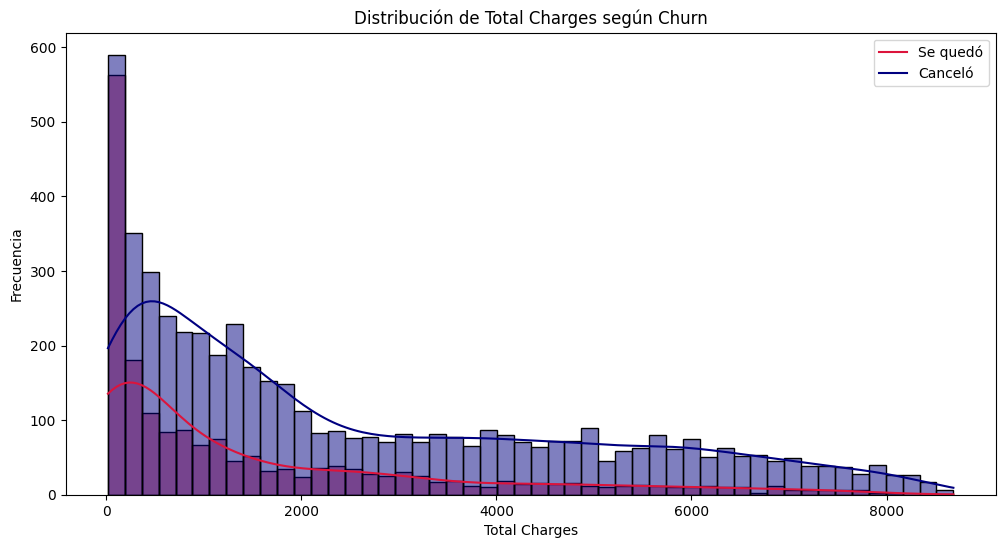

In [26]:
plt.figure(figsize=(12, 6))

sns.histplot(df2, x='total_charges', hue='churn_label', kde=True, bins=50, palette={0: 'navy', 1: 'crimson'})
plt.title('Distribución de Total Charges según Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frecuencia')
plt.legend(['Se quedó', 'Canceló'])

plt.show()


In [27]:
df2.groupby('churn_label')['total_charges'].describe()

,count,mean,std,min,25%,50%,75%,max
churn_label,,,,,,,,
0,5174.0,2550.792103,2329.091754,18.80,574.3875,1679.525,4262.85,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.5000,703.550,2331.30,8684.80


In [28]:
from scipy.stats import mannwhitneyu

churned = df2[df2['churn_label'] == 1]['total_charges']
stayed = df2[df2['churn_label'] == 0]['total_charges']

# Realizar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(churned, stayed, alternative='two-sided')

print(f"U-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Evaluar la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los pagos totales entre los clientes que abandonaron y los que se quedaron.")
else:
    print("No se rechaza la hipótesis nula: No hay suficiente evidencia para decir que los pagos totales influyen en el churn.")


U-Statistic: 3373129.0
P-Value: 7.06946421110085e-84
Rechazamos la hipótesis nula: Hay una diferencia significativa en los pagos totales entre los clientes que abandonaron y los que se quedaron.


**📌 Conclusión sobre Total Charges y Churn** 💰📉  

El análisis de la métrica **total_charges** revela una diferencia clara entre los clientes que se quedaron y los que abandonaron:  

🔹 Los clientes que **se quedaron** tienen un pago total **promedio de 2550.79**, mientras que los que **abandonaron** solo alcanzan **1531.79**.  
🔹 La **mediana** también refleja esta brecha: **1679.52** para los que se quedan vs. **703.55** para los que abandonan.  
🔹 La **dispersión (std)** es alta en ambos casos, lo que indica que hay una gran variabilidad en los pagos totales dentro de cada grupo.  


➡️ Un gran porcentaje de clientes que cancelaron su servicio tenían **cargos totales cercanos a 0**, lo que indica que muchos eran **clientes nuevos o de corto plazo**.  

➡️ A medida que los cargos totales aumentan, la proporción de clientes que cancelan disminuye.  

📌 **Confirmación con la visualización:**  
Los clientes con valores más altos de Total Charges se **comportan de manera similar**, ya sea que se queden o cancelen, solo que en menor frecuencia. Esto sugiere que la retención mejora con el tiempo y que los clientes más antiguos (con más pagos acumulados) son menos propensos a cancelar.  

🛠 **Estrategias a considerar:**  
✅ Implementar programas de **fidelización** para clientes nuevos con total_charges bajos.  
✅ Analizar qué servicios contratan los clientes de pagos altos para replicar estrategias en nuevos usuarios.  
✅ Ofrecer promociones o beneficios a clientes con menor facturación total para incentivar la permanencia.  

🚀 **Conclusión final:**  
La relación entre pagos totales y churn es clara: **los clientes con pagos acumulados más bajos son más propensos a abandonar**. Esto refuerza la idea de que **la retención de clientes nuevos** debe ser una prioridad, ya que los clientes con historial de pagos más altos muestran una mayor lealtad al servicio.


---

## - 🔌 **Preferencias en los Servicios Contratados:** [Ver visualización](scr\Notebooks\online_services.ipynb)  

In [29]:
df = pd.read_csv(r"scr\data\clean\online_options_clean.csv")
df1 = pd.read_csv(r"scr\data\clean\status_analysis_clean.csv")
df2 = pd.merge(left = df, right =df1, on ="customer_id")

In [30]:
df2.head()

,customer_id,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,satisfaction_score,cltv,customer_status,churn_label,churn_category,churn_group,razon_abandono
0,0002-ORFBO,9,Yes,Yes,No,16,Yes,Sin oferta,Yes,2,3,2205,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
1,0003-MKNFE,9,Yes,Yes,Yes,10,No,Sin oferta,No,0,5,5414,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
2,0004-TLHLJ,4,Yes,Yes,No,30,Yes,Offer E,No,0,1,4479,Churned,Yes,Competitor,"[70, 80)",Competitor had better devices
3,0011-IGKFF,13,Yes,Yes,No,4,Yes,Offer D,Yes,1,1,3714,Churned,Yes,Dissatisfaction,"[90, 100)",Product dissatisfaction
4,0013-EXCHZ,3,Yes,Yes,No,11,Yes,Sin oferta,Yes,3,1,3464,Churned,Yes,Dissatisfaction,"[60, 70)",Network reliability



---

### **1️⃣ Relación entre el tipo de servicio de Internet y el churn**  
💡 **Hipótesis:** Los clientes que tienen servicio de Internet presentan una mayor probabilidad de churn en comparación con los que no tienen.  

----


In [31]:
# Contamos cuántos clientes hay en cada grupo
internet_churn_counts = df2.groupby('internet_service')['churn_label'].value_counts().unstack()
# Renombramos las columnas para mayor claridad
internet_churn_counts.columns = ['No Abandonó', 'Abandonó']

# Mostramos la tabla
print(internet_churn_counts)


                  No Abandonó  Abandonó
internet_service                       
No                       1413       113
Yes                      3761      1756


internet_service
No      7.40
Yes    31.83
dtype: float64


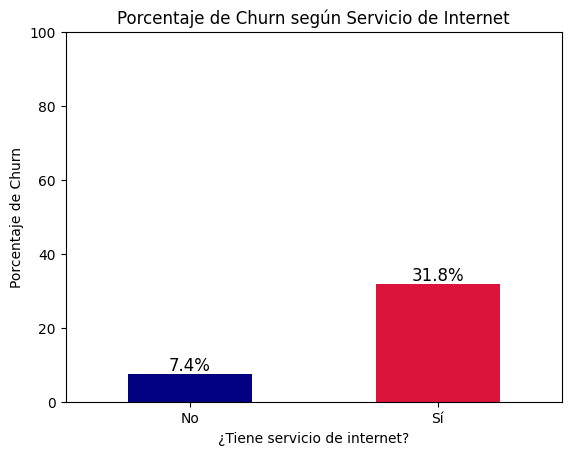

In [32]:
# Calculamos el porcentaje de churn dentro de cada grupo
internet_churn_percentage = (internet_churn_counts['Abandonó'] / internet_churn_counts.sum(axis=1)) * 100

# Mostramos los resultados
print(round(internet_churn_percentage,2))

# Graficamos los porcentajes
internet_churn_percentage.plot(kind='bar', color=['navy', 'crimson'])

# Agregamos etiquetas
plt.title('Porcentaje de Churn según Servicio de Internet')
plt.xlabel('¿Tiene servicio de internet?')
plt.ylabel('Porcentaje de Churn')
plt.xticks(ticks=[0,1], labels=['No', 'Sí'], rotation=0)
plt.ylim(0, 100)

# Mostrar valores en las barras
for i, v in enumerate(internet_churn_percentage):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.show()

📊 **Conclusión**:  

✅ Podemos notar que de las personas que poseen el **servicio de internet**, **el 31,83%** termina abandonando, mientras que aquellos que **no lo tienen** solo abandonan en un **7,40%**. 📉  

💡 Esto **coincide con nuestra hipótesis**: aunque los clientes con servicio de internet **abandonan más** que los que no lo tienen, el número de clientes que **sí poseen el servicio y deciden quedarse** sigue siendo **altamente positivo** para la empresa. 🚀  

📈 Esto representa una gran oportunidad para fortalecer la **fidelización** de los clientes con internet mediante mejoras en la calidad del servicio, promociones o beneficios adicionales. 💼✨

---

### **2️⃣ Impacto de los servicios telefónicos en el churn**  

💡 **Hipótesis:** Los clientes con múltiples líneas telefónicas (*multiple_lines = Yes*) tienen menor churn que los que solo tienen una línea o ninguna.  

---


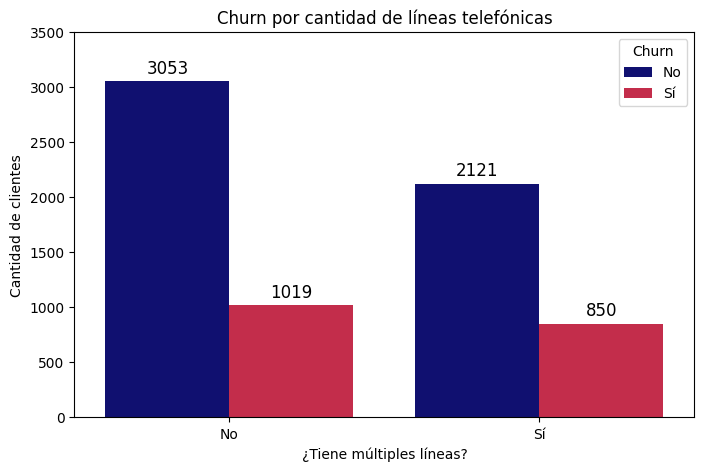

In [33]:
# Contar el número de clientes en cada categoría
multiple_churn_counts = df2.groupby('multiple_lines')['churn_label'].value_counts().unstack()

# Crear la figura y el gráfico
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df2, x='multiple_lines', hue='churn_label', palette=['navy', 'crimson'])

plt.title('Churn por cantidad de líneas telefónicas')
plt.xlabel('¿Tiene múltiples líneas?')
plt.ylabel('Cantidad de clientes')
plt.ylim(0, 3500)
plt.xticks(ticks=[0,1], labels=['No', 'Sí'], rotation=0)
plt.legend(title='Churn', labels=['No', 'Sí'])

# Agregar etiquetas encima de cada barra
for p in ax.containers:  # Obtener las barras por grupo
    ax.bar_label(p, fmt='%d', label_type='edge', fontsize=12, padding=3, color='black')

plt.show()


In [34]:
import scipy.stats as stats

# Creamos la tabla de contingencia
contingency_table = pd.crosstab(df2['multiple_lines'], df2['churn_label'])

# Aplicamos la prueba de chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-cuadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe una relación significativa entre tener múltiples líneas y el churn.")
else:
    print("No hay evidencia suficiente para afirmar que tener múltiples líneas influye en el churn.")


Chi-cuadrado: 11.143251001456251, p-valor: 0.0008433795342472428
Existe una relación significativa entre tener múltiples líneas y el churn.


📊 **Conclusión**:  

🔍 Podemos notar en el gráfico las diferencias en las cantidades, aunque sabemos que la diferencia entre los clientes que **abandonaron** y los que **no**, es muy pequeña.  

📉 Sin embargo, la **estadística inferencial** nos demuestra que existe una relación **significativa** entre el **abandono del servicio** y el **no poseer múltiples líneas** 📡.  

👉 Esto sugiere que los clientes con una sola línea tienen **mayor riesgo de churn**, lo que podría indicar una oportunidad para estrategias de retención, como **promociones para líneas adicionales** o **beneficios exclusivos para usuarios individuales**. 🚀


---

### **3️⃣ Efecto de las ofertas en la retención de clientes**  
💡 **Hipótesis:** Los clientes que han recibido una oferta (*offer ≠ "Sin oferta"*) tienen una menor tasa de churn que los que no han recibido ninguna.  

---

In [35]:
df2['churn_group'].unique()

array(['[60, 70)', '[70, 80)', '[90, 100)', '[50, 60)', '[20, 30)',
       '[40, 50)', '[30, 40)', '[80, 90)', '[0, 10)'], dtype=object)

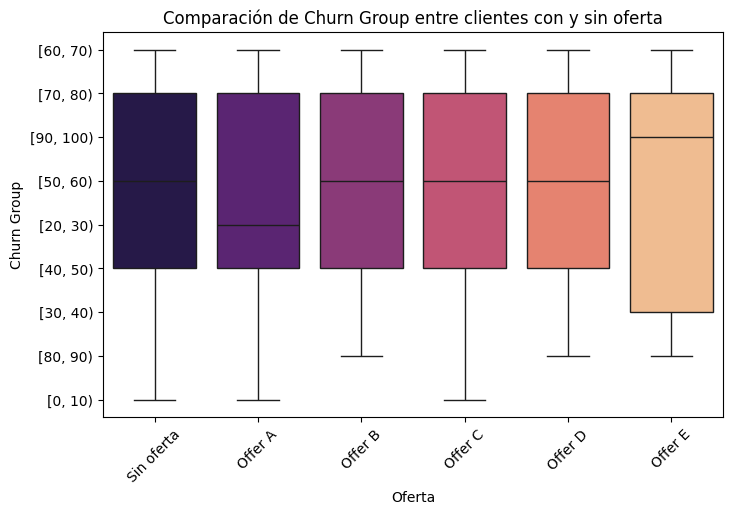

          Offer A     Offer B     Offer C     Offer D     Offer E   Sin oferta
count    2.000000    2.000000    2.000000    2.000000    2.000000     2.000000
mean   260.000000  412.000000  207.500000  301.000000  402.500000  1938.500000
std    318.198052  439.820418  159.099026  197.989899   33.234019  1255.114537
min     35.000000  101.000000   95.000000  161.000000  379.000000  1051.000000
25%    147.500000  256.500000  151.250000  231.000000  390.750000  1494.750000
50%    260.000000  412.000000  207.500000  301.000000  402.500000  1938.500000
75%    372.500000  567.500000  263.750000  371.000000  414.250000  2382.250000
max    485.000000  723.000000  320.000000  441.000000  426.000000  2826.000000 

La columna 'Churn Group', se basa en una columna realizada a base de un modelo predictivo, donde nos indica ese valor de predicción entre 0 a 100.
Cuanto más se acerque a 100, mayor la probabilidad de abandono


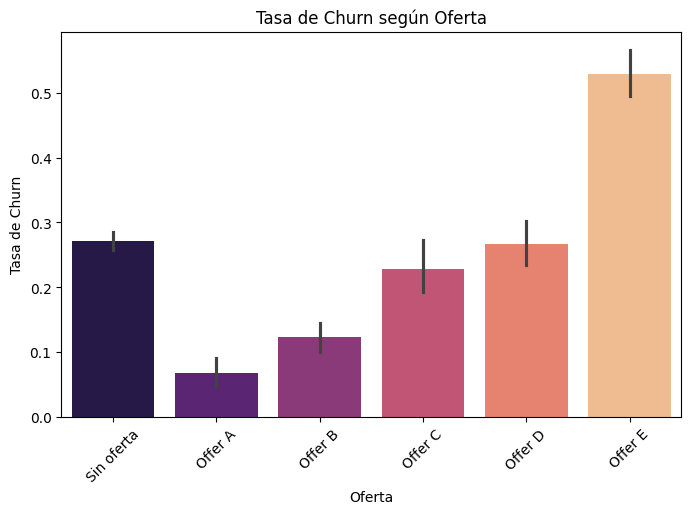

offer        Offer A  Offer B  Offer C  Offer D  Offer E  Sin oferta
churn_label                                                         
No               485      723      320      441      379        2826
Yes               35      101       95      161      426        1051


In [36]:
from scipy.stats import ttest_ind, mannwhitneyu

order = ['Sin oferta', 'Offer A', 'Offer B', 'Offer C', 'Offer D', 'Offer E']

# Comparar Churn Score entre clientes con y sin oferta
plt.figure(figsize=(8,5))
sns.boxplot(data=df2, x='offer', y='churn_group', palette='magma', order=order)
plt.title('Comparación de Churn Group entre clientes con y sin oferta')
plt.xlabel('Oferta')
plt.ylabel('Churn Group')
plt.xticks(rotation=45)
plt.show()

values_offer_mean = df2.groupby('churn_label')['offer'].apply(lambda x: x.value_counts()).unstack().describe()
print(values_offer_mean, "\n")

print("La columna 'Churn Group', se basa en una columna realizada a base de un modelo predictivo, donde nos indica ese valor de predicción entre 0 a 100.\n\
Cuanto más se acerque a 100, mayor la probabilidad de abandono")

plt.figure(figsize=(8,5))
sns.barplot(data=df2, x='offer', y=df2['churn_label'].apply(lambda x: 1 if x == 'Yes' else 0), palette='magma', order=order)
plt.title('Tasa de Churn según Oferta')
plt.xlabel('Oferta')
plt.ylabel('Tasa de Churn')

plt.xticks(rotation=45)
plt.show()

values_offer = df2.groupby('churn_label')['offer'].value_counts().unstack()
print(values_offer)

**📊 Análisis por oferta**  

1. **Sin oferta (mayoría de clientes, pero alto churn)**  
   - *Total de clientes sin oferta:* **3877** (2826 + 1051).  
   - *Churn (clientes que abandonaron):* **1051 (27.1%)**.  
   - Parece que la falta de una oferta podría estar relacionada con una tasa de abandono más alta.  

2. **Offer A (churn muy bajo)**  
   - *Clientes que se quedaron:* **485**  
   - *Clientes que abandonaron:* **35** (**6.7% churn**).  
   - Es la oferta con menor churn, lo que sugiere que funciona bien para retener clientes.  

3. **Offer B (buen desempeño, pero churn más alto que A)**  
   - *Clientes que se quedaron:* **723**  
   - *Clientes que abandonaron:* **101** (**12.3% churn**).  
   - Aunque más efectiva que no tener oferta, sigue teniendo algo de churn.  

4. **Offer C (moderada en retención, pero peor que A y B)**  
   - *Clientes que se quedaron:* **320**  
   - *Clientes que abandonaron:* **95** (**22.9% churn**).  
   - No parece ser una oferta muy efectiva en comparación con A y B.  

5. **Offer D (rendimiento medio en churn)**  
   - *Clientes que se quedaron:* **441**  
   - *Clientes que abandonaron:* **161** (**26.7% churn**).  
   - Similar a *Sin oferta*, lo que indica que podría no ser una oferta atractiva o útil.  

6. **Offer E (alto churn a pesar de muchos clientes)**  
   - *Clientes que se quedaron:* **379** 
   - *Clientes que abandonaron:* **426** (**52.9% churn**).  
   - Es la **peor oferta en términos de churn**. Más clientes abandonan de los que se quedan.  

---

🔎 **Conclusiones clave**  

✔️ **La mejor oferta en retención es Offer A (6.7% churn).**  
✔️ **Sin oferta tiene una tasa de churn del 27.1%, lo que indica que las ofertas podrían reducir la deserción.**  
✔️ **Offer E es la peor en retención (52.9% churn), lo que sugiere que no es atractiva o los clientes que la toman no se quedan.**  
✔️ **Offer C y D no parecen ser significativamente mejores que no tener oferta.**  
✔️ **Offer B es efectiva, pero aún tiene margen de mejora.**  


In [37]:
df2['churn_group'].unique()

array(['[60, 70)', '[70, 80)', '[90, 100)', '[50, 60)', '[20, 30)',
       '[40, 50)', '[30, 40)', '[80, 90)', '[0, 10)'], dtype=object)

In [38]:
# Función para obtener el valor medio del rango
def obtener_media(rango):
    numeros = [int(num) for num in rango.strip('[]()').split(',')]  # Extrae los números
    return np.mean(numeros)  # Calcula la media

# Aplicar la transformación
df2['churn_group'] = df2['churn_group'].apply(obtener_media)

# Ver los valores transformados
print(df2['churn_group'].head())


0    65.0
1    65.0
2    75.0
3    95.0
4    65.0
Name: churn_group, dtype: float64


In [39]:
# Extraer los datos para clientes con y sin oferta
oferta_si = df2[df2['offer'] != 'Sin oferta']['churn_group']
oferta_no = df2[df2['offer'] == 'Sin oferta']['churn_group']

# Prueba t de Student
t_stat, p_value = ttest_ind(oferta_si, oferta_no, equal_var=False)

print(f"Prueba t-test: Estadístico = {t_stat:.2f}, p-valor = {p_value:.4f}")

Prueba t-test: Estadístico = -0.57, p-valor = 0.5713


In [40]:
def prueba_t_por_oferta(df, columna_oferta='offer', columna_churn='churn_group', sin_oferta='Sin oferta'):
    # Filtrar los datos de clientes sin oferta
    oferta_no = df[df[columna_oferta] == sin_oferta][columna_churn]

    resultados = []

    # Iterar por cada tipo de oferta
    for offer_type in df[columna_oferta].unique():
        if offer_type != sin_oferta:  # Excluir "Sin oferta"
            oferta_si = df[df[columna_oferta] == offer_type][columna_churn]
            
            # Prueba t de Student
            t_stat, p_value = ttest_ind(oferta_si, oferta_no, equal_var=False)
            
            resultados.append({
                "Oferta": offer_type,
                "Estadístico t": round(t_stat, 2),
                "p-valor": round(p_value, 4)
            })
    
    return resultados

# Ejecutar la función y mostrar los resultados
resultados_t_test = prueba_t_por_oferta(df2)
for res in resultados_t_test:
    print(f"Oferta {res['Oferta']} -> t = {res['Estadístico t']}, p-valor = {res['p-valor']}")


Oferta Offer E -> t = 10.08, p-valor = 0.0
Oferta Offer D -> t = -0.41, p-valor = 0.6853
Oferta Offer A -> t = -8.48, p-valor = 0.0
Oferta Offer B -> t = -4.91, p-valor = 0.0
Oferta Offer C -> t = -0.54, p-valor = 0.5925


**📌 Interpretación de los Resultados**  

| **Oferta**  | **t-valor**  | **p-valor**  | **Conclusión** |
|-------------|-------------|-------------|---------------|
| **Offer E** | **10.08** | **0.0** | 🔥 Tiene un impacto significativo, pero al ser **positivo**, sugiere que los clientes con esta oferta tienen mayor churn. |
| **Offer D** | -0.41 | 0.6853 | ❌ No hay evidencia de que esta oferta afecte el churn. |
| **Offer A** | **-8.48** | **0.0** | ✅ Tiene un efecto **significativo** en la **reducción del churn**. |
| **Offer B** | **-4.91** | **0.0** | ✅ También ayuda a **reducir el churn**, aunque menos que Offer A. |
| **Offer C** | -0.54 | 0.5925 | ❌ No hay evidencia de que esta oferta haga una diferencia. |




**🔎 Conclusión general:**
1. **Offer A y Offer B ayudan a reducir el churn** (valores negativos y p < 0.05).  
2. **Offer E parece incrementar el churn** (t positivo y p < 0.05). Tal vez esta oferta atrae clientes que luego se van más rápido.  
3. **Offer C y Offer D no muestran un impacto claro**.  

**📌 Acciones**:  

- Revisar **qué incluye Offer E** y por qué puede estar afectando negativamente. 
- Fomentar el uso de **Offer A y B** si el objetivo es **reducir el churn**.  
- No gastar demasiados recursos en Offer C y D si no hacen diferencia.  

----

## - 📡 **Uso de Servicios Online y su Relación con el Churn:** [Ver visualización](scr\Notebooks\online_services.ipynb)  

In [41]:
df = pd.read_csv(r"scr\data\clean\online_services_clean.csv")
df1 = pd.read_csv(r"scr\data\clean\status_analysis_clean.csv")
df2 = pd.merge(left = df, right =df1, on ="customer_id")

In [42]:
df2.head()

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,satisfaction_score,cltv,customer_status,churn_label,churn_category,churn_group,razon_abandono
0,0002-ORFBO,1,1,0,1,0,1,1,0,0,Cable,3,2205,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
1,0003-MKNFE,1,1,0,0,0,0,0,1,1,Cable,5,5414,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
2,0004-TLHLJ,1,1,0,0,1,0,0,0,0,Fiber Optic,1,4479,Churned,Yes,Competitor,"[70, 80)",Competitor had better devices
3,0011-IGKFF,1,1,0,1,1,0,1,1,0,Fiber Optic,1,3714,Churned,Yes,Dissatisfaction,"[90, 100)",Product dissatisfaction
4,0013-EXCHZ,1,1,0,0,0,1,1,0,0,Fiber Optic,1,3464,Churned,Yes,Dissatisfaction,"[60, 70)",Network reliability



---

### **1️⃣ Hipótesis 1: Relación entre la cantidad de servicios y el abandono** 📊  
🔍 **Análisis**: Evaluamos si los clientes que tienen más servicios contratados **abandonan menos** que aquellos con menos servicios.  

---  


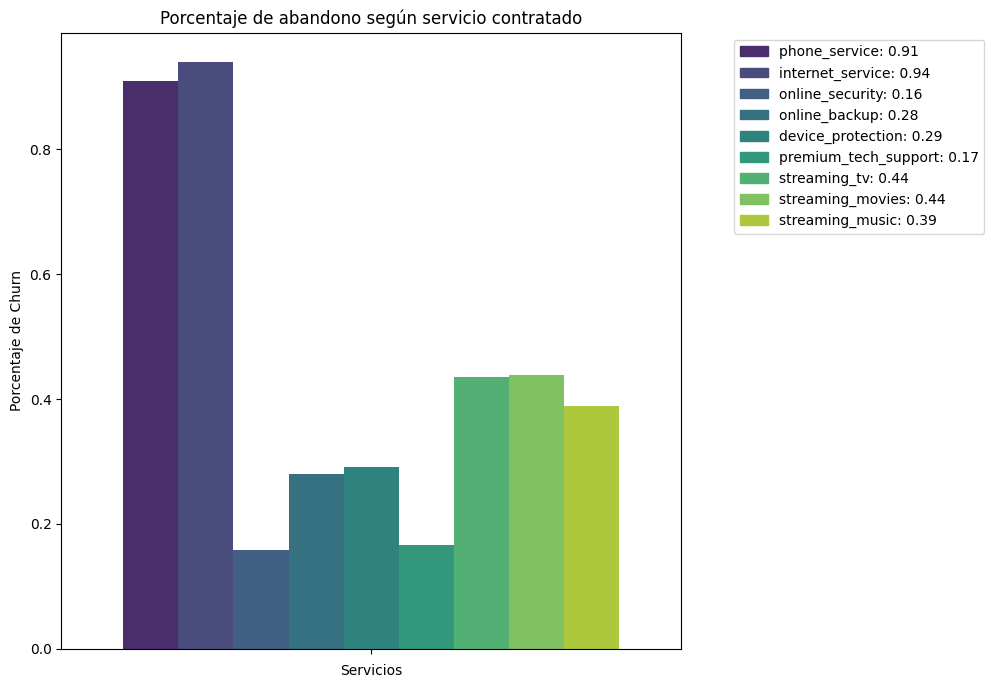

In [43]:
import matplotlib.patches as mpatches

# Crear columnas binarias para cada servicio (1 si lo tiene, 0 si no lo tiene)
servicios = df2.loc[: , 'phone_service' : 'streaming_music']
df2['total_servicios'] = servicios.sum(axis=1)

# Gráfico 1: Churn por tipo de servicio
plt.figure(figsize=(8,8))
servicio_churn = df2[df2['churn_label'] == 'Yes'][servicios.columns].mean()  # Porcentaje de churn en cada servicio
ax = sns.barplot(hue=servicio_churn.index, y=servicio_churn.values, palette="viridis", width=0.8)

# Crear etiquetas personalizadas para la leyenda
patches = [mpatches.Patch(color=bar.get_facecolor(), label=f"{servicio}: {valor:.2f}") 
           for servicio, bar, valor in zip(servicio_churn.index, ax.patches, servicio_churn.values)]

# Agregar la leyenda con colores correctos
plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.title("Porcentaje de abandono según servicio contratado")
plt.xlabel("Servicios")
plt.xticks(rotation=45)
plt.ylabel("Porcentaje de Churn")
plt.show()

- 📊 Notamos que ciertos servicios como **internet** 🌐 y **teléfono** 📞 presentan un mayor porcentaje de abandono en comparación con otros. Habría que tomar acción sobre estos servicios y analizar qué está sucediendo con los mismos debido a su alto porcentaje de churn, ya que **son los únicos que superan el 90%**, mientras que el resto no llega al 50%.

In [44]:
# ¿ Cuántos más servicios, menos abandonan?
df2.groupby('churn_label')['total_servicios'].value_counts().unstack()

total_servicios,1,2,3,4,5,6,7,8,9
churn_label,,,,,,,,,
No,1454,347,484,549,602,582,536,399,221
Yes,145,333,356,303,287,235,141,56,13


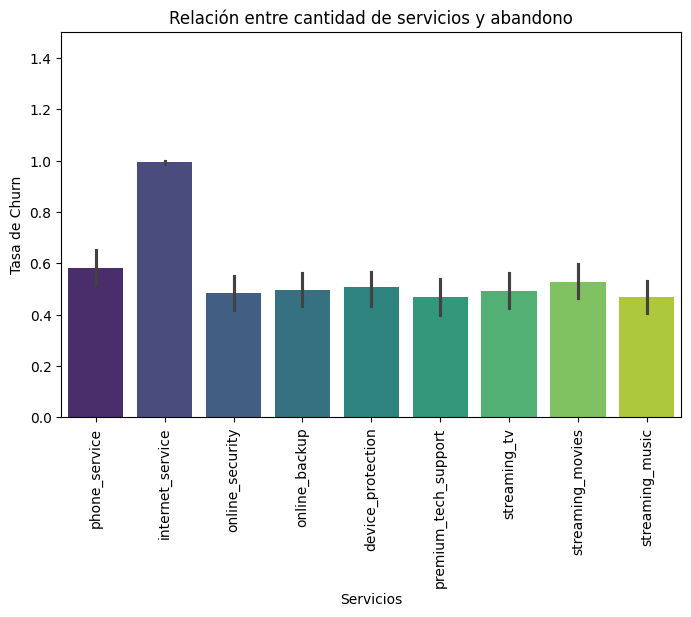

In [45]:
# Seleccionar solo las columnas de servicios de streaming
servicios = ['phone_service', 'internet_service', 'online_security', 'online_backup',
             'device_protection', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music']

# Calcular la tasa de churn promedio para cada servicio
services_churn = df2.groupby(servicios)['churn_label'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Transformar el DataFrame para que las columnas sean categorías en X
services_churn = services_churn.melt(id_vars=['churn_label'], var_name="Servicio", value_name="Tasa de Churn")

# Crear el gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(data=services_churn, x="Servicio", y="Tasa de Churn", palette="viridis", legend=False)

# Personalización del gráfico
plt.title("Relación entre cantidad de servicios y abandono")
plt.xlabel("Servicios")
plt.ylabel("Tasa de Churn")
plt.ylim(0, 1.5)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


| total_servicios | No   | Yes | Tasa de Churn (%) |
|---------------|------|------|------------------|
| 1             | 1454 | 145  | (145 / (1454 + 145)) * 100 = **9.07%** |
| 2             | 347  | 333  | (333 / (347 + 333)) * 100 = **48.98%** |
| 3             | 484  | 356  | (356 / (484 + 356)) * 100 = **42.39%** |
| 4             | 549  | 303  | (303 / (549 + 303)) * 100 = **35.55%** |
| 5             | 602  | 287  | (287 / (602 + 287)) * 100 = **32.29%** |
| 6             | 582  | 235  | (235 / (582 + 235)) * 100 = **28.76%** |
| 7             | 536  | 141  | (141 / (536 + 141)) * 100 = **20.82%** |
| 8             | 399  | 56   | (56 / (399 + 56)) * 100 = **12.31%** |
| 9             | 221  | 13   | (13 / (221 + 13)) * 100 = **5.56%** |


**📊 Conclusión:**
- La tasa de churn es **más alta en clientes con 2 y 3 servicios** (alrededor del **49% y 42%**).
- A medida que aumentan los servicios contratados, la tasa de churn **disminuye progresivamente**.
- Los clientes con **9 servicios casi no abandonan** (solo **5.56%**).  

Esto indica que los clientes con pocos servicios o con solo algunos específicos tienden a abandonar más, mientras que quienes contratan más servicios son más leales. 🚀


---

📌 **Conclusión sobre los gráficos de churn**  

Para comprender el impacto del churn en los servicios contratados, ambos gráficos ofrecen perspectivas complementarias:  

✅ **El primer gráfico** permite identificar **qué servicios específicos tienen mayores tasas de abandono**, ayudando a detectar cuáles requieren mejoras o estrategias de retención.  

✅ **El segundo gráfico** profundiza en **cómo la combinación de servicios influye en la tasa de churn**, revelando patrones más complejos en el comportamiento de los clientes.  

**En conjunto, estos análisis proporcionan una visión más completa**, permitiendo no solo identificar servicios con alta fuga, sino también entender si ciertas combinaciones agravan el problema. 


-----


> En el segundo gráfico, esas **9 barras representan cada servicio**, pero no de manera individual como en el primer gráfico.  
> 
> **¿Qué significa cada barra en el segundo gráfico?**  
> 📊 **Cada barra representa la tasa de churn promedio de los clientes que tienen ese servicio, considerando la combinación de servicios que poseen.**  
>
> ##### **Ejemplo para entenderlo mejor**  
> Imagina que tenemos 3 clientes con diferentes servicios:  
>
> | Cliente | Internet | Streaming TV | Seguridad Online | Churn |
> |---------|---------|--------------|------------------|-------|
> | A       | ✅      | ❌           | ✅               | Sí (1) |
> | B       | ✅      | ✅           | ❌               | Sí (1) |
> | C       | ❌      | ✅           | ✅               | No (0) |
>
>
>
> 1. Para calcular la **tasa de churn del servicio "Internet"**, miramos a los clientes que lo tienen (`A y B`). De ellos, **el 100% hizo churn**, así que su barra sería 1.0.  
> 2. Para el servicio **"Streaming TV"**, miramos a los clientes que lo tienen (`B y C`). Solo `B` hizo churn (50%), entonces su barra sería 0.5.  
> 3. Para **"Seguridad Online"**, de los clientes que lo tienen (`A y C`), solo `A` hizo churn (50%), así que su barra sería 0.5.  
>
> ##### **Diferencia clave con el primer gráfico**  
> - **Primer gráfico:** Mira el churn de cada servicio de forma **individual** (sin importar qué otros servicios tiene el cliente).  
> - **Segundo gráfico:** Calcula el churn **promedio** para cada servicio **teniendo en cuenta la combinación de servicios** de cada cliente.  
>
> Por eso, las barras en el segundo gráfico pueden ser diferentes al primer gráfico.

----

##### **¿Qué servicios logran la mayor deserción en su combinación?**

In [46]:
# Convertir churn_label a valores numéricos (Yes -> 1, No -> 0)
df2["churn_numeric"] = df2["churn_label"].map({"Yes": 1, "No": 0})

# Crear una nueva columna combinando los servicios activados en cada fila
df2["comb_servicios"] = df2[servicios].astype(str).agg('-'.join, axis=1)

# Calcular el churn promedio por cada combinación de servicios
churn_por_comb = df2.groupby("comb_servicios")["churn_numeric"].mean().reset_index()

# Filtrar solo las combinaciones con alto churn (>97%)
churn_por_comb = churn_por_comb[churn_por_comb["churn_numeric"] > 0.97]

# Ordenar de mayor a menor churn
churn_por_comb = churn_por_comb.sort_values(by="churn_numeric", ascending=False)

# Mostrar las combinaciones más críticas
churn_por_comb


,comb_servicios,churn_numeric
12,0-1-0-0-1-0-0-0-1,1.0
13,0-1-0-0-1-0-0-1-0,1.0
19,0-1-0-0-1-1-0-1-0,1.0
27,0-1-0-1-0-0-1-0-1,1.0
44,0-1-0-1-1-1-1-1-0,1.0
47,0-1-1-0-0-0-0-1-0,1.0
62,0-1-1-0-1-1-0-0-1,1.0
94,1-1-0-0-0-0-1-0-1,1.0
109,1-1-0-0-1-0-1-0-1,1.0
124,1-1-0-1-0-0-1-0-1,1.0


In [47]:
# Lista de nombres de los servicios en orden
servicios = ['phone_service', 'internet_service', 'online_security', 'online_backup',
             'device_protection', 'tech_support_premiun', 'streaming_tv', 'streaming_movies', 'streaming_music']

# Función para mapear cada combinación de 0s y 1s a los nombres de los servicios
def decode_services(comb_str):
    valores = list(map(int, comb_str.split('-')))  # Convertir string a lista de enteros
    servicios_activos = [serv for serv, val in zip(servicios, valores) if val == 1]  # Filtrar los que son 1
    return ", ".join(servicios_activos)  # Unir en un solo string

# Aplicar la función a cada combinación en churn_por_comb
churn_por_comb["Servicios_Activos"] = churn_por_comb["comb_servicios"].apply(decode_services)

# Mostrar los resultados con los nombres de los servicios
print(churn_por_comb[["Servicios_Activos", "churn_numeric"]].to_string())


                                                                                                     Servicios_Activos  churn_numeric
12                                                                internet_service, device_protection, streaming_music            1.0
13                                                               internet_service, device_protection, streaming_movies            1.0
19                                         internet_service, device_protection, tech_support_premiun, streaming_movies            1.0
27                                                      internet_service, online_backup, streaming_tv, streaming_music            1.0
44            internet_service, online_backup, device_protection, tech_support_premiun, streaming_tv, streaming_movies            1.0
47                                                                 internet_service, online_security, streaming_movies            1.0
62                         internet_service, online_security, 

##### **🔎 Conclusión sobre los Servicios Activos**  
📌 **Observación clave:** Todas las combinaciones de servicios listadas tienen un churn del **100%** (es decir, todos los clientes con estas combinaciones se dieron de baja).  

🔹 **Internet Service aparece en todas las combinaciones** → Indica que los clientes con este servicio tienen un mayor riesgo de abandono.  
🔹 **Servicios como Device Protection, Streaming TV y Streaming Music son recurrentes** → Puede significar que los clientes que contratan múltiples servicios de entretenimiento o protección no encuentran suficiente valor en ellos.  
🔹 **La combinación con Phone Service también muestra alto churn** → Esto sugiere que tener tanto teléfono como internet no garantiza la permanencia del cliente.  

##### **📊 Recomendaciones**  
✅ **Revisar la calidad del servicio de internet** y sus costos, ya que es un factor común en el abandono.  
✅ **Analizar el valor de los paquetes de servicios** para entender si los clientes perciben que el costo no justifica el beneficio.  
✅ **Realizar encuestas o entrevistas** para identificar qué problemas enfrentan estos clientes antes de cancelar el servicio.  

📢 **Conclusión general:** Algunas combinaciones de servicios presentan un abandono extremadamente alto, lo que sugiere que ciertos paquetes pueden no estar cumpliendo con las expectativas de los clientes. Es necesario investigar si esto se debe a precio, calidad o falta de personalización de la oferta. 



---

### **2️⃣ Hipótesis 2: Relación entre los servicios de streaming y el churn** 🎬🎵📺  
🔍 **Análisis**: Investigamos si los clientes que tienen **servicios de streaming** (TV, películas, música) **abandonan más o menos** que los que no los tienen.  

---

   streaming_tv  streaming_movies  streaming_music  churn_label
0             0                 0                0     0.215965
1             0                 0                1     0.646465
2             0                 1                0     0.533333
3             0                 1                1     0.278020
4             1                 0                0     0.299320
5             1                 0                1     0.718750
6             1                 1                0     0.448148
7             1                 1                1     0.269461


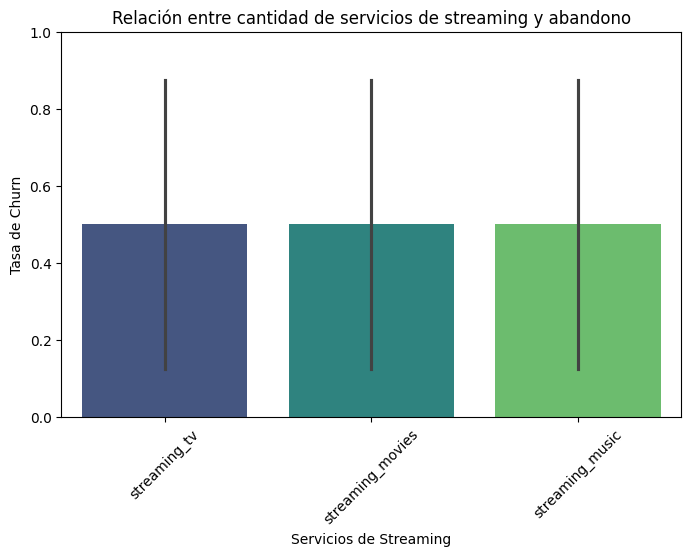

In [48]:
# Seleccionar solo las columnas de servicios de streaming
servicios_streaming = ['streaming_tv', 'streaming_movies', 'streaming_music']

# Calcular la tasa de churn promedio para cada servicio
streaming_churn = df2.groupby(servicios_streaming)['churn_label'].apply(lambda x: (x == 'Yes').mean()).reset_index()

print(streaming_churn)

# Transformar el DataFrame para que las columnas sean categorías en X
streaming_churn = streaming_churn.melt(id_vars=['churn_label'], var_name="Servicio", value_name="Tasa de Churn")

# Crear el gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(data=streaming_churn, x="Servicio", y="Tasa de Churn", palette="viridis", legend=False)

# Personalización del gráfico
plt.title("Relación entre cantidad de servicios de streaming y abandono")
plt.xlabel("Servicios de Streaming")
plt.ylabel("Tasa de Churn")
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


- **Cada fila representa un grupo de clientes que tienen ciertos servicios de streaming activados (`1`) o no (`0`)**.
- **La última columna (`churn_label`) muestra el porcentaje de churn en ese grupo**.

🔹 **Ejemplo de lectura:**
🔸 La fila `1` (`0,0,1`) representa clientes que **solo tienen `streaming_music` activado**.  
🔹 El **64.6% de ellos hizo churn** (abandonó el servicio).  

🔸 La fila `7` (`1,1,1`) representa clientes que **tienen los tres servicios activados**.  
🔹 Solo **26.9% hizo churn**, lo que sugiere que los clientes con más servicios contratados tienen menor tasa de abandono.

---

##### **Conclusión**

Los clientes que **no tienen ningún servicio de streaming** (fila 0) presentan un churn del **21.6%**, mientras que aquellos que sí tienen **alguna combinación de streaming** muestran variaciones importantes en la tasa de abandono:  

✅ **Tener solo Streaming Music** aumenta el churn al **64.6%**, lo que indica que los clientes que contratan solo este servicio tienen un alto riesgo de abandono.  
✅ **Tener solo Streaming Movies** también eleva el churn al **53.3%**, aunque menos que solo Streaming Music.  
✅ **Tener solo Streaming TV** mantiene un churn moderado de **29.9%**.  
✅ **Tener múltiples servicios de streaming no garantiza una reducción del churn**:  
   - **Streaming TV + Streaming Music** → **71.9%** (el más alto de todos).  
   - **Streaming TV + Streaming Movies** → **44.8%**.  
   - **Los tres servicios juntos tienen el churn más bajo de todas las combinaciones (26.9%)**, lo que sugiere que los clientes que usan todos los servicios de streaming están más satisfechos.  

💡 **Contratar un solo servicio de streaming (especialmente música) está fuertemente asociado con un mayor churn**.  
💡 **Los clientes que contratan todos los servicios de streaming parecen más comprometidos y menos propensos a cancelar**.  
💡 **El alto churn de quienes tienen solo streaming music o solo streaming movies sugiere que estos servicios pueden no ser suficientemente atractivos cuando se contratan individualmente**.  

**Recomendación:** Evaluar la percepción de valor de los paquetes de streaming y considerar estrategias como descuentos en combos o mejorar la oferta individual de Streaming Music y Movies para retener a estos clientes. 



----

## **5️⃣ Conclusión y próximos pasos**

Tras realizar un análisis exploratorio y validar distintas hipótesis, hemos identificado factores clave que influyen en la retención de clientes. Entre ellos, el **tipo de contrato, método de pago y total de cargos** destacan como variables con mayor relación con el churn. Aunque el **género no mostró diferencias significativas**, se incluirá en el análisis multivariante para evaluar si, en combinación con otras variables, aporta información relevante.  

En la siguiente etapa, profundizaremos en un **análisis multivariante** a través de un **dashboard interactivo**, donde priorizaremos el impacto del tipo de contrato, método de pago y género. Esto permitirá evaluar patrones adicionales y definir estrategias más enfocadas para reducir la tasa de abandono.  

### **✅ Próximos Pasos**  

1️⃣ **Perfil del Cliente con Mayor Riesgo de Churn:**   
   - Clientes con **contratos mensuales** presentan una mayor tasa de abandono.  
   - **Métodos de pago automáticos** tienden a retener más clientes que los manuales.  
   - Aquellos con **cargos totales más bajos** tienen mayor probabilidad de abandonar, lo que sugiere que muchos clientes churners son nuevos usuarios sin lealtad establecida.  

2️⃣ **Factores Geográficos y Socioeconómicos:**  
   - Se han detectado patrones regionales de churn relacionados con la latitud y longitud.  
   - Los clientes **solteros** tienen una tasa de abandono más alta en comparación con los casados, lo que podría indicar diferencias en el compromiso financiero o estabilidad económica.  

3️⃣ **Estrategia Basada en Datos:**  
   - Implementaremos un **dashboard dinámico** para visualizar estos patrones en tiempo real y tomar decisiones basadas en datos.  
   - **Acciones específicas** serán diseñadas para mejorar la retención en segmentos de alto riesgo.  
   - Profundizaremos en el impacto de **ofertas y promociones**, evaluando su efectividad en la retención de clientes o si es necesario rediseñarlas para mejorar su impacto.

Con esta información, nuestra empresa podrá anticiparse al churn y optimizar estrategias de fidelización, enfocándose en los segmentos más vulnerables. 🚀📊  